# Heart disease UCI
## Exploratory Data Analysis and Classification

## Table of contents
1. [Introduction](#Introduction)
2. [Data analysis](#data-analysis)
3. [Visualization](#visualization)
4. [Classification](#classification)

## Introduction <a name="introduction"></a>

The data contains information about 303 patients with chest pain and other medical information.
The aim of this analysis is to analyse the chest pain and patient information and create classificator which can predict type of chest pain based on other provided information.


## Data source:
Kaggle - [Heart disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)

## Data Analysis <a name="data-analysis"></a>

### Data description
- **age**
- **sex** - 0 = female, 1 = male
- **cp** - chest pain type. 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4= asymptomatic
- **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
- **chol** - serum cholestoral in mg/dl
- **fbs** - fasting blood sugar > 120 mg/dl. 0 = false, 1 = true
- **restecg** - resting electrocardiographic results. 0 =  normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalach** - maximum heart rate achieved
- **exang** - exercise induced angina. 0 = no, 1 = yes
- **oldpeak** - oldpeak = ST depression induced by exercise relative to rest
- **slope** - the slope of the peak exercise ST segment. 1 = upsloping, 2 = flat, 3 = downsloping
- **ca** - number of major vessels (0-3) colored by flourosopy
- **thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')


In [31]:
heart_df_raw = pd.read_csv('./data/heart.csv')
heart_df_raw

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
heart_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Changing the category of categorical variables:

In [35]:
# heart_df_raw['cp'] = heart_df_raw['cp'].astype('object')
# heart_df_raw['fbs'] = heart_df_raw['fbs'].astype('object')
# heart_df_raw['restecg'] = heart_df_raw['restecg'].astype('object')
# heart_df_raw['exang'] = heart_df_raw['exang'].astype('object')
# heart_df_raw['slope'] = heart_df_raw['ca'].astype('object')
# heart_df_raw['thal'] = heart_df_raw['thal'].astype('object')
# heart_df_raw['target'] = heart_df_raw['target'].astype('object')

In [24]:
heart_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


In [25]:
heart_df_raw.isnull().values.any()

False

In [26]:
heart_df_raw.describe()

,age,sex,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,0.466011,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [28]:
df_objects = heart_df_raw.select_dtypes(include=['object'])
df_objects.apply(pd.Series.value_counts)


,cp,fbs,restecg,exang,slope,thal,target
0,143.0,258.0,147.0,204.0,175,2.0,138.0
1,50.0,45.0,152.0,99.0,65,18.0,165.0
2,87.0,NaN,4.0,NaN,38,166.0,NaN
3,23.0,NaN,NaN,NaN,20,117.0,NaN
4,NaN,NaN,NaN,NaN,5,NaN,NaN


## Visualization <a name="visualization"></a>

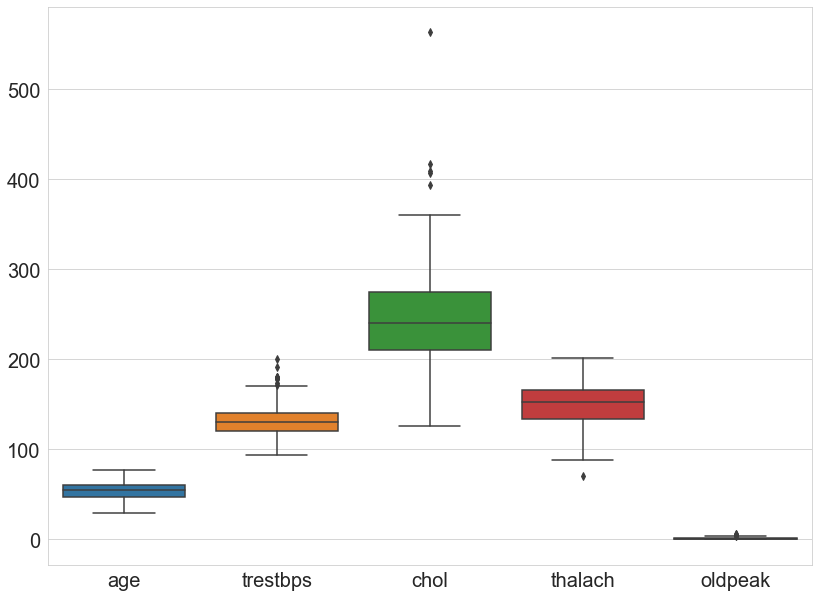

In [27]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
df_boxplot = heart_df_raw[["age", "trestbps", "chol", "thalach", "oldpeak"]]
fig.set_size_inches(13.7, 10.27)
ax = sns.boxplot(data=df_boxplot, orient="v")
plt.xticks(fontsize= 20) 
plt.yticks(fontsize= 20) 
plt.show()

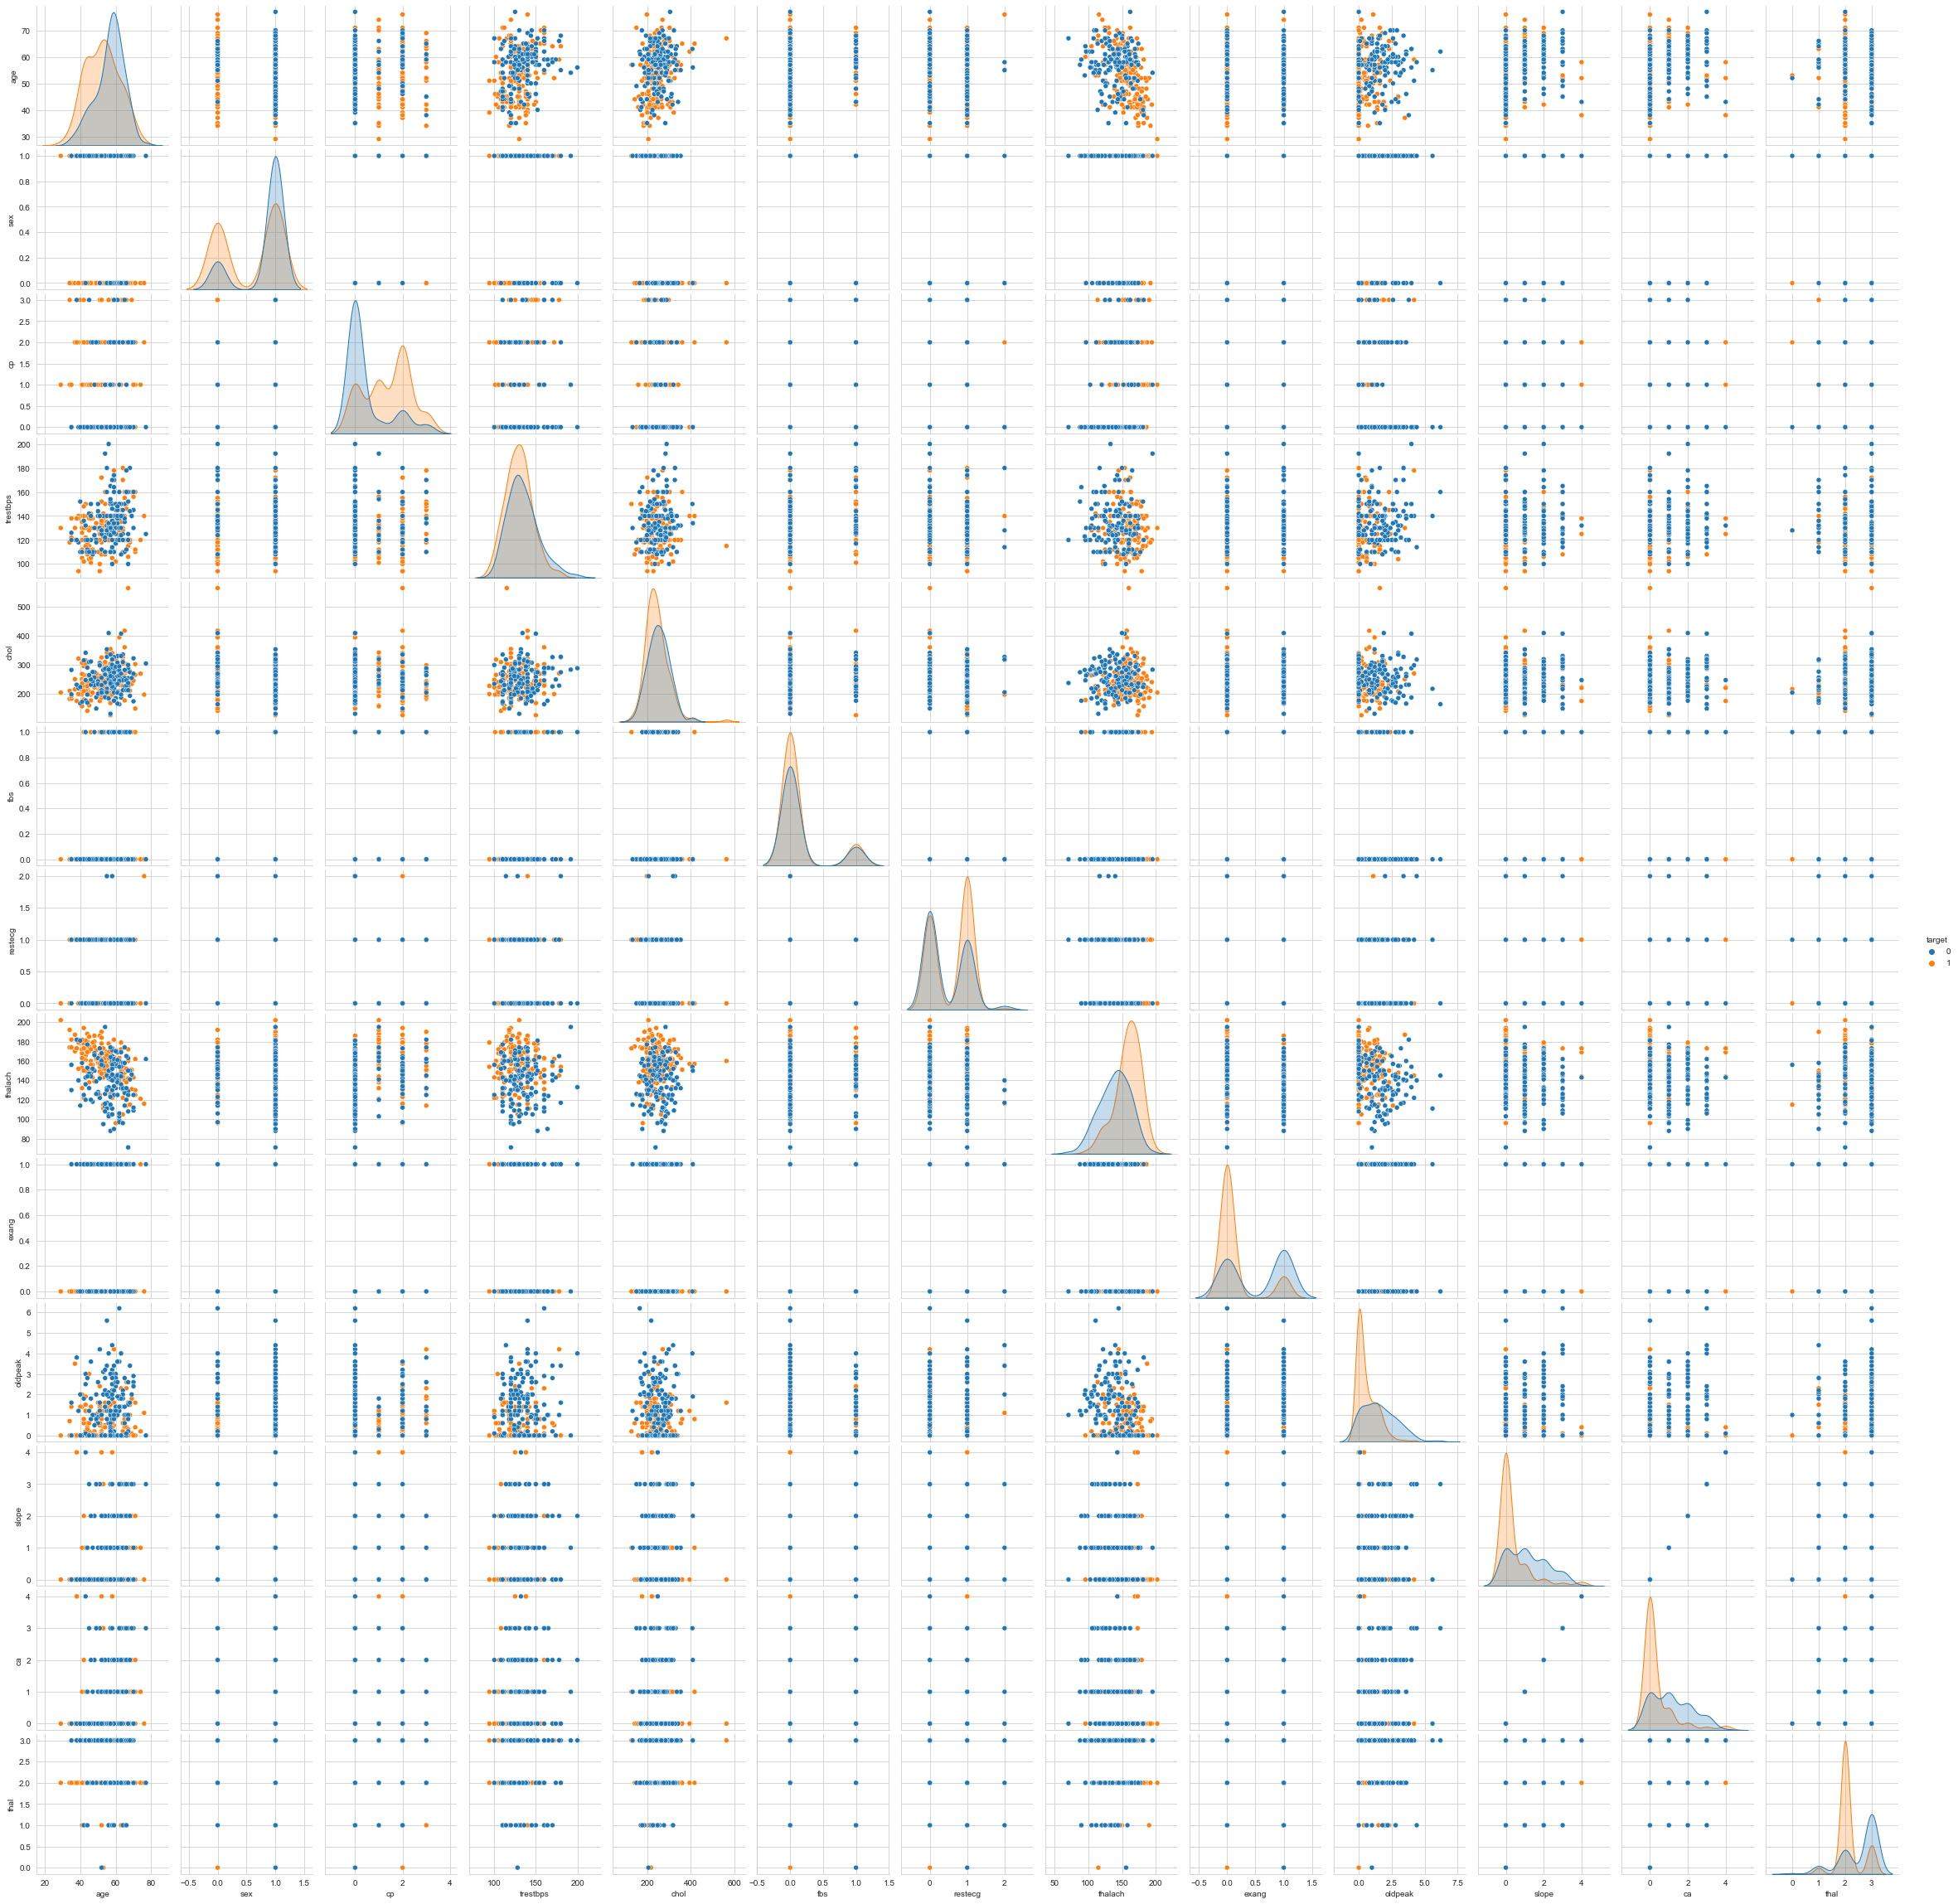

In [41]:
# fig, ax = plt.subplots()
sns.pairplot(heart_df_raw,  hue="target")
plt.show()

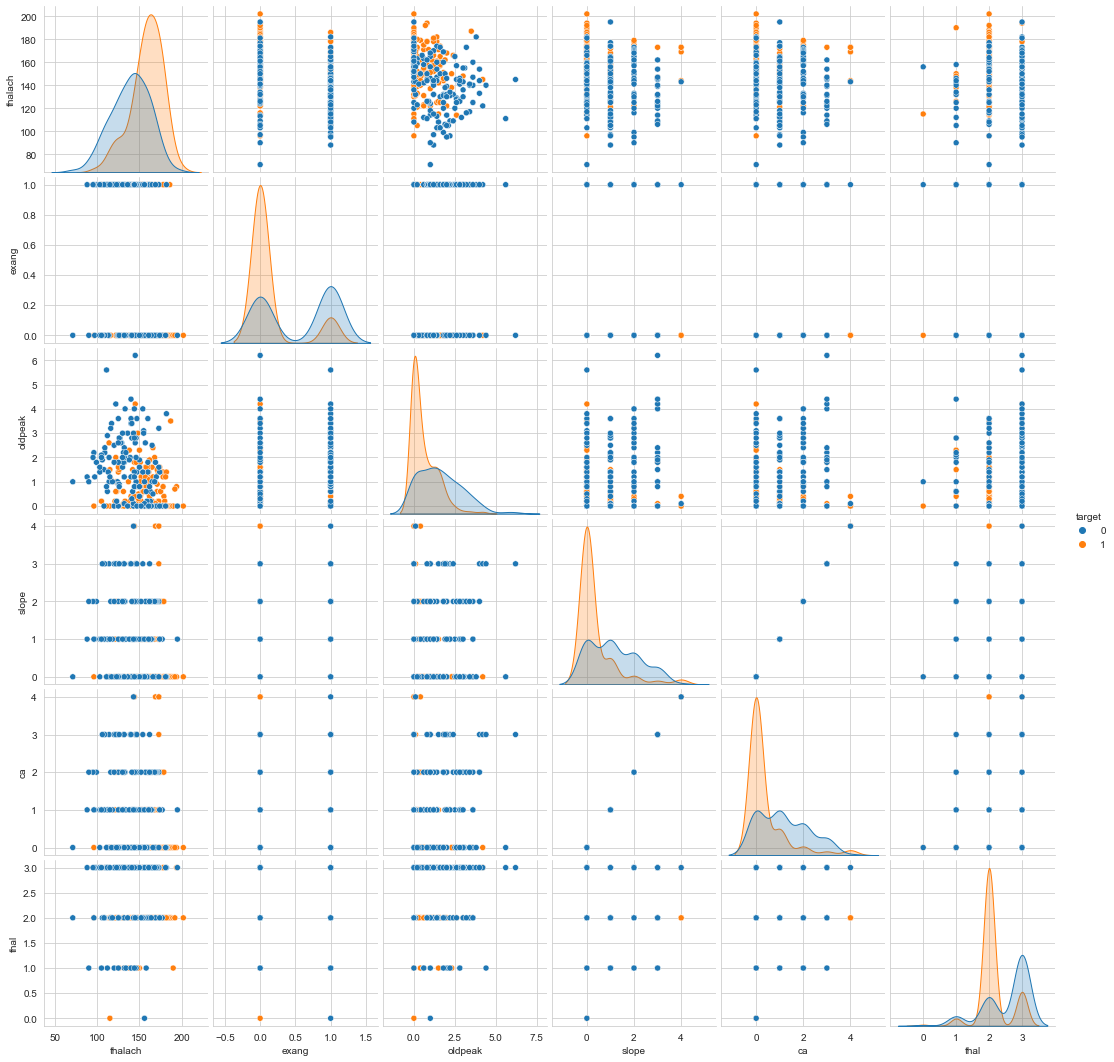

In [43]:
sns.pairplot(heart_df_raw[["thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]],  hue="target")

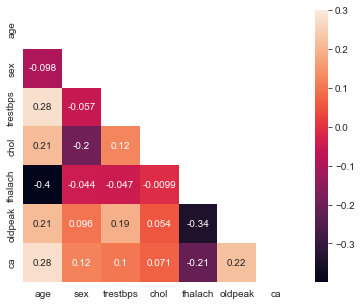

In [49]:
corr = heart_df_raw.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True,)

TO-DO

## Classification <a name="classification"></a>